In [10]:
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv('./data.csv')

In [12]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [13]:
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

In [14]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)
test_scaled = scaler.fit_transform(test_input)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)

0.9689149560117302

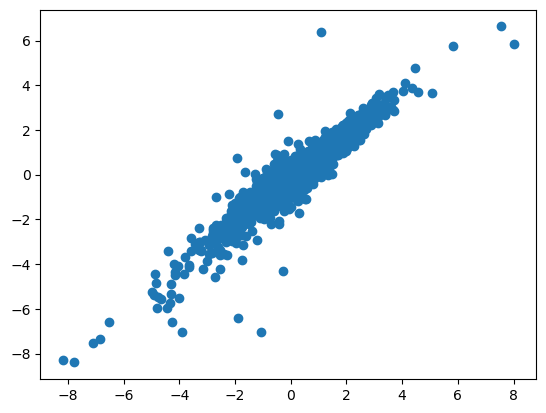

In [30]:
import matplotlib.pyplot as plt

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.show()

훈련 세트 정확도: 0.9998044583496285
테스트 세트 정확도: 0.9683284457478006
분류 보고서:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1647
           1       0.61      0.19      0.29        58

    accuracy                           0.97      1705
   macro avg       0.79      0.59      0.64      1705
weighted avg       0.96      0.97      0.96      1705

혼동 행렬:
 [[1640    7]
 [  47   11]]


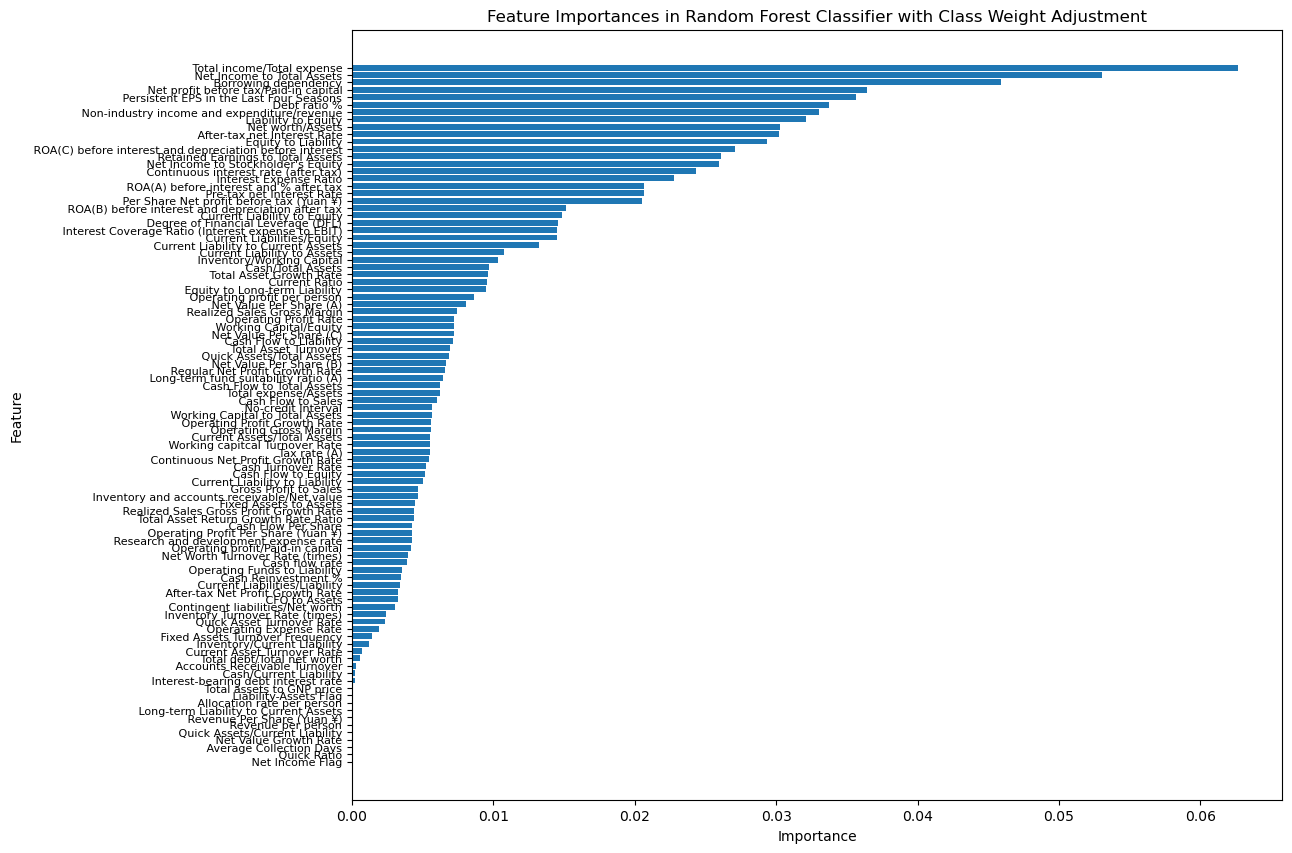

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('./data.csv')

# 특성과 타겟 변수 분리
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_input)
X_test_scaled = scaler.transform(test_input)

# 클래스 가중치 조정하여 랜덤 포레스트 분류 모델 학습
rf_model_weighted = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_weighted.fit(X_train_scaled, train_target)

# 예측
train_predictions = rf_model_weighted.predict(X_train_scaled)
test_predictions = rf_model_weighted.predict(X_test_scaled)

# 모델 평가
train_accuracy = accuracy_score(train_target, train_predictions)
test_accuracy = accuracy_score(test_target, test_predictions)
classification_rep = classification_report(test_target, test_predictions)
conf_matrix = confusion_matrix(test_target, test_predictions)

print(f"훈련 세트 정확도: {train_accuracy}")
print(f"테스트 세트 정확도: {test_accuracy}")
print("분류 보고서:\n", classification_rep)
print("혼동 행렬:\n", conf_matrix)

# 특성 중요도 확인
importances = rf_model_weighted.feature_importances_
features = data_input.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(12, 10))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Classifier with Class Weight Adjustment')
plt.gca().invert_yaxis()
plt.yticks(fontsize=8)  # y축 레이블 글꼴 크기 조정
plt.show()


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import numpy as np

# 데이터 불러오기
data = pd.read_csv('./data.csv')

# 특성과 타겟 변수 분리
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_input)
X_test_scaled = scaler.transform(test_input)

# 클래스 가중치 조정하여 랜덤 포레스트 분류 모델 학습
rf_model_weighted = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_weighted.fit(X_train_scaled, train_target)

# 예측
train_predictions = rf_model_weighted.predict(X_train_scaled)
test_predictions = rf_model_weighted.predict(X_test_scaled)

# 모델 평가 - 정확도
train_accuracy = accuracy_score(train_target, train_predictions)
test_accuracy = accuracy_score(test_target, test_predictions)

# 모델 평가 - MSE, MAE
train_mse = mean_squared_error(train_target, train_predictions)
test_mse = mean_squared_error(test_target, test_predictions)
train_mae = mean_absolute_error(train_target, train_predictions)
test_mae = mean_absolute_error(test_target, test_predictions)

print(f"훈련 세트 정확도: {train_accuracy}")
print(f"테스트 세트 정확도: {test_accuracy}")
print(f"훈련 세트 MSE: {train_mse}")
print(f"테스트 세트 MSE: {test_mse}")
print(f"훈련 세트 MAE: {train_mae}")
print(f"테스트 세트 MAE: {test_mae}")

# 교차 검증 (Cross-Validation)
cv_scores = cross_val_score(rf_model_weighted, data_input, data_target, cv=5)
cv_predictions = cross_val_predict(rf_model_weighted, data_input, data_target, cv=5)

# 교차 검증 평가 - 정확도
cv_accuracy = np.mean(cv_scores)

# 교차 검증 평가 - MSE, MAE
cv_mse = mean_squared_error(data_target, cv_predictions)
cv_mae = mean_absolute_error(data_target, cv_predictions)

print("교차 검증 평균 정확도: ", cv_accuracy)
print("교차 검증 MSE: ", cv_mse)
print("교차 검증 MAE: ", cv_mae)


훈련 세트 정확도: 0.9998044583496285
테스트 세트 정확도: 0.9683284457478006
훈련 세트 MSE: 0.00019554165037152912
테스트 세트 MSE: 0.03167155425219941
훈련 세트 MAE: 0.00019554165037152912
테스트 세트 MAE: 0.03167155425219941
교차 검증 평균 정확도:  0.965977563723286
교차 검증 MSE:  0.03402258395659188
교차 검증 MAE:  0.03402258395659188


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import numpy as np
import lightgbm as lgb

# 데이터 불러오기
data = pd.read_csv('./data.csv')

# 특성과 타겟 변수 분리
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_input)
X_test_scaled = scaler.transform(test_input)

# LightGBM 모델 학습
lgb_model = lgb.LGBMClassifier(random_state=42, class_weight='balanced')
lgb_model.fit(X_train_scaled, train_target)

# 예측
train_predictions = lgb_model.predict(X_train_scaled)
test_predictions = lgb_model.predict(X_test_scaled)

# 모델 평가 - 정확도
train_accuracy = accuracy_score(train_target, train_predictions)
test_accuracy = accuracy_score(test_target, test_predictions)

# 모델 평가 - MSE, MAE
train_mse = mean_squared_error(train_target, train_predictions)
test_mse = mean_squared_error(test_target, test_predictions)
train_mae = mean_absolute_error(train_target, train_predictions)
test_mae = mean_absolute_error(test_target, test_predictions)

print(f"훈련 세트 정확도: {train_accuracy}")
print(f"테스트 세트 정확도: {test_accuracy}")
print(f"훈련 세트 MSE: {train_mse}")
print(f"테스트 세트 MSE: {test_mse}")
print(f"훈련 세트 MAE: {train_mae}")
print(f"테스트 세트 MAE: {test_mae}")

# 교차 검증 (Cross-Validation)
cv_scores = cross_val_score(lgb_model, data_input, data_target, cv=5)
cv_predictions = cross_val_predict(lgb_model, data_input, data_target, cv=5)

# 교차 검증 평가 - 정확도
cv_accuracy = np.mean(cv_scores)

# 교차 검증 평가 - MSE, MAE
cv_mse = mean_squared_error(data_target, cv_predictions)
cv_mae = mean_absolute_error(data_target, cv_predictions)

print("교차 검증 평균 정확도: ", cv_accuracy)
print("교차 검증 MSE: ", cv_mse)
print("교차 검증 MAE: ", cv_mae)


[LightGBM] [Info] Number of positive: 162, number of negative: 4952
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23713
[LightGBM] [Info] Number of data points in the train set: 5114, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
훈련 세트 정확도: 1.0
테스트 세트 정확도: 0.9695014662756598
훈련 세트 MSE: 0.0
테스트 세트 MSE: 0.030498533724340176
훈련 세트 MAE: 0.0
테스트 세트 MAE: 0.030498533724340176
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 176, number of negative: 5279
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23714
[LightGBM] [Info] Number

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import numpy as np
import lightgbm as lgb
import warnings

# 경고 무시 설정
warnings.filterwarnings("ignore", category=UserWarning)

# 데이터 불러오기
data = pd.read_csv('./data.csv')

# 특성과 타겟 변수 분리
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_input)
X_test_scaled = scaler.transform(test_input)

# LightGBM 모델 하이퍼파라미터 튜닝
lgb_model = lgb.LGBMClassifier(random_state=42, min_gain_to_split=0.01)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, train_target)

best_lgb_model = grid_search.best_estimator_

# 최적의 하이퍼파라미터로 모델 학습
best_lgb_model.fit(X_train_scaled, train_target)

# 예측
train_predictions = best_lgb_model.predict(X_train_scaled)
test_predictions = best_lgb_model.predict(X_test_scaled)

# 모델 평가 - 정확도
train_accuracy = accuracy_score(train_target, train_predictions)
test_accuracy = accuracy_score(test_target, test_predictions)

# 모델 평가 - MSE, MAE
train_mse = mean_squared_error(train_target, train_predictions)
test_mse = mean_squared_error(test_target, test_predictions)
train_mae = mean_absolute_error(train_target, train_predictions)
test_mae = mean_absolute_error(test_target, test_predictions)

print(f"훈련 세트 정확도: {train_accuracy}")
print(f"테스트 세트 정확도: {test_accuracy}")
print(f"훈련 세트 MSE: {train_mse}")
print(f"테스트 세트 MSE: {test_mse}")
print(f"훈련 세트 MAE: {train_mae}")
print(f"테스트 세트 MAE: {test_mae}")

# 교차 검증 (Cross-Validation)
cv_scores = cross_val_score(best_lgb_model, data_input, data_target, cv=5)
cv_predictions = cross_val_predict(best_lgb_model, data_input, data_target, cv=5)

# 교차 검증 평가 - 정확도
cv_accuracy = np.mean(cv_scores)

# 교차 검증 평가 - MSE, MAE
cv_mse = mean_squared_error(data_target, cv_predictions)
cv_mae = mean_absolute_error(data_target, cv_predictions)

print("교차 검증 평균 정확도: ", cv_accuracy)
print("교차 검증 MSE: ", cv_mse)
print("교차 검증 MAE: ", cv_mae)


[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Info] Number of positive: 162, number of negative: 4952
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003719 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23713
[LightGBM] [Info] Number of data points in the train set: 5114, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.031678 -> initscore=-3.419950
[LightGBM] [Info] Start training from score -3.419950
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [4]:
print(f"훈련 세트 정확도: {train_accuracy}")
print(f"테스트 세트 정확도: {test_accuracy}")
print(f"훈련 세트 MSE: {train_mse}")
print(f"테스트 세트 MSE: {test_mse}")
print(f"훈련 세트 MAE: {train_mae}")
print(f"테스트 세트 MAE: {test_mae}")
print("교차 검증 평균 정확도: ", cv_accuracy)
print("교차 검증 MSE: ", cv_mse)
print("교차 검증 MAE: ", cv_mae)


훈련 세트 정확도: 0.9941337504888541
테스트 세트 정확도: 0.9689149560117302
훈련 세트 MSE: 0.005866249511145874
테스트 세트 MSE: 0.031085043988269796
훈련 세트 MAE: 0.005866249511145874
테스트 세트 MAE: 0.031085043988269796
교차 검증 평균 정확도:  0.9615792746292356
교차 검증 MSE:  0.03842205601994427
교차 검증 MAE:  0.03842205601994427


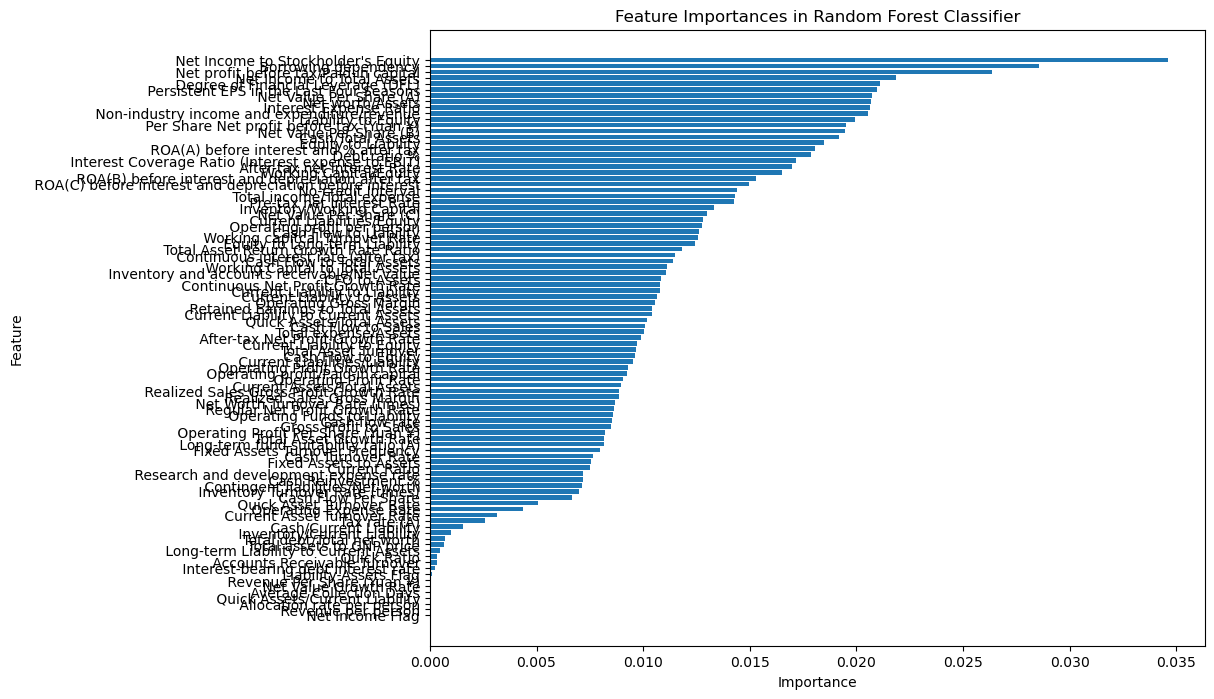

훈련 세트 정확도 (중요도 낮은 특성 제거): 1.0
테스트 세트 정확도 (중요도 낮은 특성 제거): 0.9689149560117302
훈련 세트 MSE (중요도 낮은 특성 제거): 0.0
테스트 세트 MSE (중요도 낮은 특성 제거): 0.031085043988269796
훈련 세트 MAE (중요도 낮은 특성 제거): 0.0
테스트 세트 MAE (중요도 낮은 특성 제거): 0.031085043988269796
교차 검증 평균 정확도:  0.9658314740427254
교차 검증 MSE:  0.03416923302537029
교차 검증 MAE:  0.03416923302537029


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
data = pd.read_csv('./data.csv')

# 특성과 타겟 변수 분리
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_input)
X_test_scaled = scaler.transform(test_input)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, train_target)

# 특성 중요도 확인
importances = rf_model.feature_importances_
features = data_input.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


# 중요도가 낮은 특성 제거 (중요도 0인 특성 제거)
important_features = feature_importances[feature_importances['Importance'] > 0]['Feature']
data_input_reduced = data_input[important_features]

# 데이터 분리 (중요도가 낮은 특성 제거 후)
train_input_reduced, test_input_reduced, train_target_reduced, test_target_reduced = train_test_split(
    data_input_reduced, data_target, random_state=42)

# 데이터 표준화 (중요도가 낮은 특성 제거 후)
X_train_scaled_reduced = scaler.fit_transform(train_input_reduced)
X_test_scaled_reduced = scaler.transform(test_input_reduced)

# 랜덤 포레스트 모델 재학습
rf_model_reduced = RandomForestClassifier(random_state=42)
rf_model_reduced.fit(X_train_scaled_reduced, train_target_reduced)

# 예측
train_predictions_reduced = rf_model_reduced.predict(X_train_scaled_reduced)
test_predictions_reduced = rf_model_reduced.predict(X_test_scaled_reduced)

# 모델 평가 - 정확도
train_accuracy_reduced = accuracy_score(train_target_reduced, train_predictions_reduced)
test_accuracy_reduced = accuracy_score(test_target_reduced, test_predictions_reduced)

# 모델 평가 - MSE, MAE
train_mse_reduced = mean_squared_error(train_target_reduced, train_predictions_reduced)
test_mse_reduced = mean_squared_error(test_target_reduced, test_predictions_reduced)
train_mae_reduced = mean_absolute_error(train_target_reduced, train_predictions_reduced)
test_mae_reduced = mean_absolute_error(test_target_reduced, test_predictions_reduced)

print(f"훈련 세트 정확도 (중요도 낮은 특성 제거): {train_accuracy_reduced}")
print(f"테스트 세트 정확도 (중요도 낮은 특성 제거): {test_accuracy_reduced}")
print(f"훈련 세트 MSE (중요도 낮은 특성 제거): {train_mse_reduced}")
print(f"테스트 세트 MSE (중요도 낮은 특성 제거): {test_mse_reduced}")
print(f"훈련 세트 MAE (중요도 낮은 특성 제거): {train_mae_reduced}")
print(f"테스트 세트 MAE (중요도 낮은 특성 제거): {test_mae_reduced}")

# 교차 검증 (Cross-Validation)
cv_scores = cross_val_score(rf_model_reduced, data_input_reduced, data_target, cv=5)
cv_predictions = cross_val_predict(rf_model_reduced, data_input_reduced, data_target, cv=5)

# 교차 검증 평가 - 정확도
cv_accuracy = np.mean(cv_scores)

# 교차 검증 평가 - MSE, MAE
cv_mse = mean_squared_error(data_target, cv_predictions)
cv_mae = mean_absolute_error(data_target, cv_predictions)

print("교차 검증 평균 정확도: ", cv_accuracy)
print("교차 검증 MSE: ", cv_mse)
print("교차 검증 MAE: ", cv_mae)


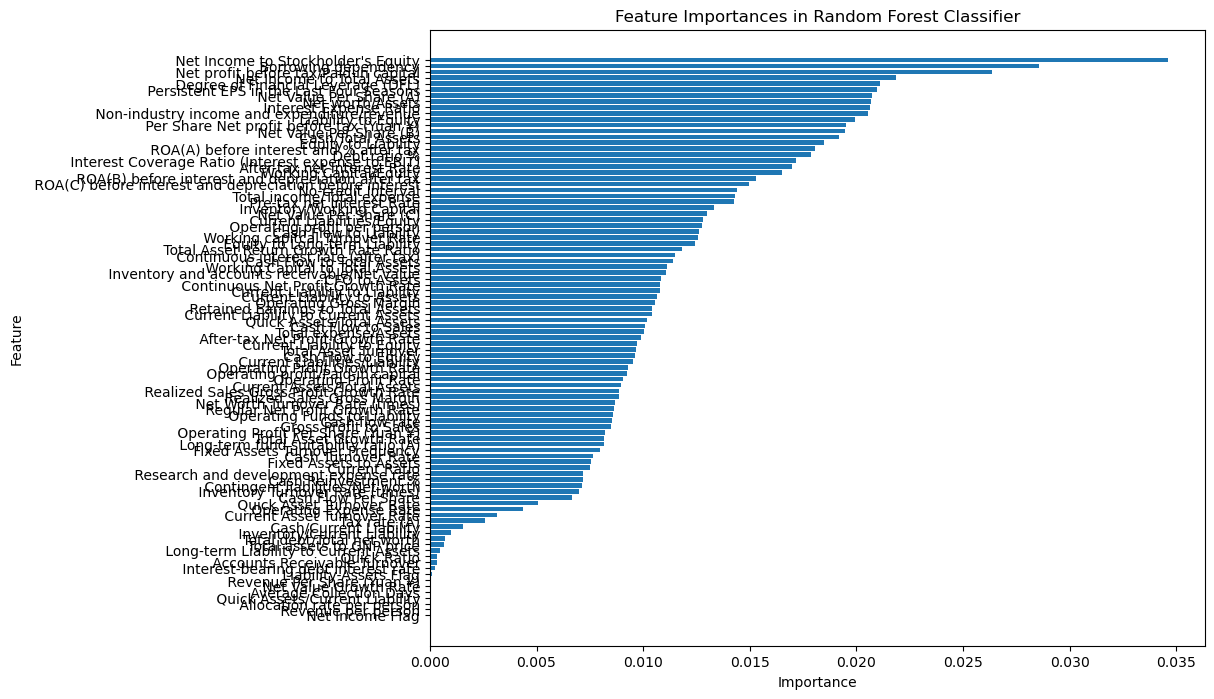

훈련 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9972624168947986
테스트 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9706744868035191
훈련 세트 MSE (하이퍼파라미터 튜닝 후): 0.002737583105201408
테스트 세트 MSE (하이퍼파라미터 튜닝 후): 0.02932551319648094
훈련 세트 MAE (하이퍼파라미터 튜닝 후): 0.002737583105201408
테스트 세트 MAE (하이퍼파라미터 튜닝 후): 0.02932551319648094
교차 검증 평균 정확도:  0.9667106613873001
교차 검증 MSE:  0.03328933861269981
교차 검증 MAE:  0.03328933861269981


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
data = pd.read_csv('./data.csv')

# 특성과 타겟 변수 분리
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_input)
X_test_scaled = scaler.transform(test_input)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, train_target)

# 특성 중요도 확인
importances = rf_model.feature_importances_
features = data_input.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 중요도가 낮은 특성 제거 (중요도 0인 특성 제거)
important_features = feature_importances[feature_importances['Importance'] > 0]['Feature']
data_input_reduced = data_input[important_features]

# 데이터 분리 (중요도가 낮은 특성 제거 후)
train_input_reduced, test_input_reduced, train_target_reduced, test_target_reduced = train_test_split(
    data_input_reduced, data_target, random_state=42)

# 데이터 표준화 (중요도가 낮은 특성 제거 후)
X_train_scaled_reduced = scaler.fit_transform(train_input_reduced)
X_test_scaled_reduced = scaler.transform(test_input_reduced)

# 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy')
grid_search.fit(X_train_scaled_reduced, train_target_reduced)

best_rf_model = grid_search.best_estimator_

# 최적의 하이퍼파라미터로 모델 재학습
best_rf_model.fit(X_train_scaled_reduced, train_target_reduced)

# 예측
train_predictions_reduced = best_rf_model.predict(X_train_scaled_reduced)
test_predictions_reduced = best_rf_model.predict(X_test_scaled_reduced)

# 모델 평가 - 정확도
train_accuracy_reduced = accuracy_score(train_target_reduced, train_predictions_reduced)
test_accuracy_reduced = accuracy_score(test_target_reduced, test_predictions_reduced)

# 모델 평가 - MSE, MAE
train_mse_reduced = mean_squared_error(train_target_reduced, train_predictions_reduced)
test_mse_reduced = mean_squared_error(test_target_reduced, test_predictions_reduced)
train_mae_reduced = mean_absolute_error(train_target_reduced, train_predictions_reduced)
test_mae_reduced = mean_absolute_error(test_target_reduced, test_predictions_reduced)

print(f"훈련 세트 정확도 (하이퍼파라미터 튜닝 후): {train_accuracy_reduced}")
print(f"테스트 세트 정확도 (하이퍼파라미터 튜닝 후): {test_accuracy_reduced}")
print(f"훈련 세트 MSE (하이퍼파라미터 튜닝 후): {train_mse_reduced}")
print(f"테스트 세트 MSE (하이퍼파라미터 튜닝 후): {test_mse_reduced}")
print(f"훈련 세트 MAE (하이퍼파라미터 튜닝 후): {train_mae_reduced}")
print(f"테스트 세트 MAE (하이퍼파라미터 튜닝 후): {test_mae_reduced}")

# 교차 검증 (Cross-Validation)
cv_scores = cross_val_score(best_rf_model, data_input_reduced, data_target, cv=3)
cv_predictions = cross_val_predict(best_rf_model, data_input_reduced, data_target, cv=3)

# 교차 검증 평가 - 정확도
cv_accuracy = np.mean(cv_scores)

# 교차 검증 평가 - MSE, MAE
cv_mse = mean_squared_error(data_target, cv_predictions)
cv_mae = mean_absolute_error(data_target, cv_predictions)

print("교차 검증 평균 정확도: ", cv_accuracy)
print("교차 검증 MSE: ", cv_mse)
print("교차 검증 MAE: ", cv_mae)


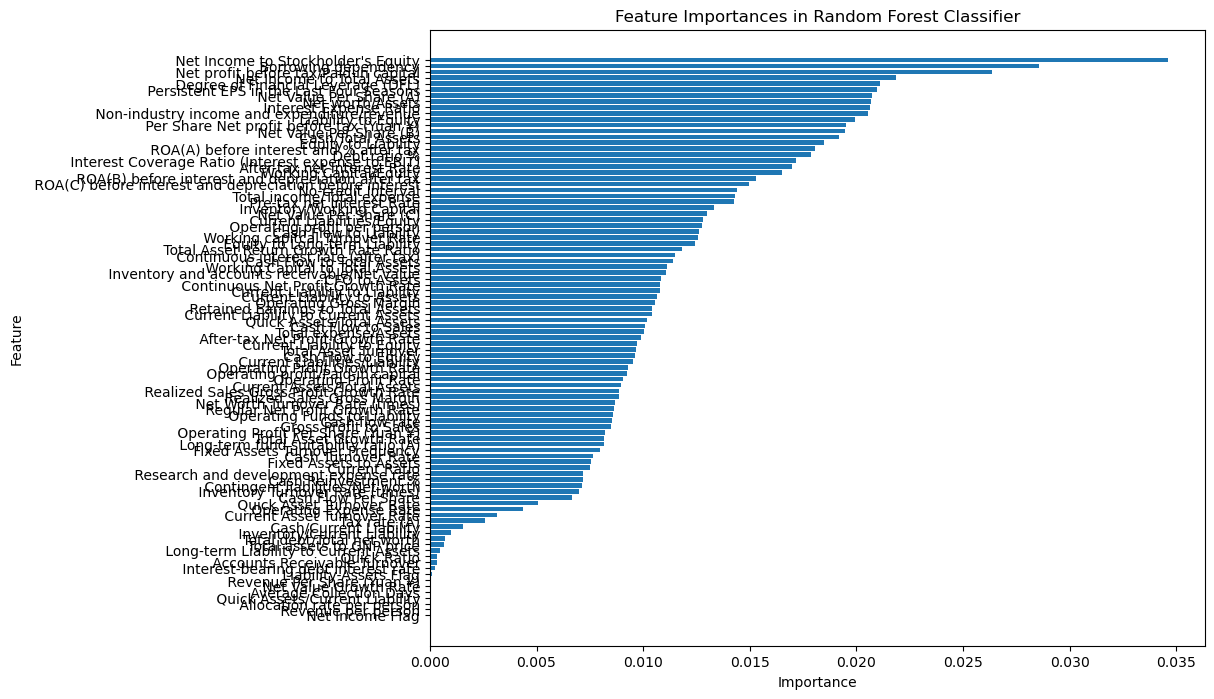

훈련 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9939382088384826
테스트 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9700879765395894
훈련 세트 MSE (하이퍼파라미터 튜닝 후): 0.006061791161517403
테스트 세트 MSE (하이퍼파라미터 튜닝 후): 0.029912023460410556
훈련 세트 MAE (하이퍼파라미터 튜닝 후): 0.006061791161517403
테스트 세트 MAE (하이퍼파라미터 튜닝 후): 0.029912023460410556
교차 검증 평균 정확도:  0.9675905557999706
교차 검증 MSE:  0.03240944420002933
교차 검증 MAE:  0.03240944420002933


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
data = pd.read_csv('./data.csv')

# 특성과 타겟 변수 분리
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_input)
X_test_scaled = scaler.transform(test_input)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, train_target)

# 특성 중요도 확인
importances = rf_model.feature_importances_
features = data_input.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

# 중요도가 낮은 특성 제거 (중요도 하위 10% 특성 제거)
threshold = feature_importances['Importance'].quantile(0.10)
important_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']
data_input_reduced = data_input[important_features]

# 데이터 분리 (중요도가 낮은 특성 제거 후)
train_input_reduced, test_input_reduced, train_target_reduced, test_target_reduced = train_test_split(
    data_input_reduced, data_target, random_state=42)

# 데이터 표준화 (중요도가 낮은 특성 제거 후)
X_train_scaled_reduced = scaler.fit_transform(train_input_reduced)
X_test_scaled_reduced = scaler.transform(test_input_reduced)

# 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy')
grid_search.fit(X_train_scaled_reduced, train_target_reduced)

best_rf_model = grid_search.best_estimator_

# 최적의 하이퍼파라미터로 모델 재학습
best_rf_model.fit(X_train_scaled_reduced, train_target_reduced)

# 예측
train_predictions_reduced = best_rf_model.predict(X_train_scaled_reduced)
test_predictions_reduced = best_rf_model.predict(X_test_scaled_reduced)

# 모델 평가 - 정확도
train_accuracy_reduced = accuracy_score(train_target_reduced, train_predictions_reduced)
test_accuracy_reduced = accuracy_score(test_target_reduced, test_predictions_reduced)

# 모델 평가 - MSE, MAE
train_mse_reduced = mean_squared_error(train_target_reduced, train_predictions_reduced)
test_mse_reduced = mean_squared_error(test_target_reduced, test_predictions_reduced)
train_mae_reduced = mean_absolute_error(train_target_reduced, train_predictions_reduced)
test_mae_reduced = mean_absolute_error(test_target_reduced, test_predictions_reduced)

print(f"훈련 세트 정확도 (하이퍼파라미터 튜닝 후): {train_accuracy_reduced}")
print(f"테스트 세트 정확도 (하이퍼파라미터 튜닝 후): {test_accuracy_reduced}")
print(f"훈련 세트 MSE (하이퍼파라미터 튜닝 후): {train_mse_reduced}")
print(f"테스트 세트 MSE (하이퍼파라미터 튜닝 후): {test_mse_reduced}")
print(f"훈련 세트 MAE (하이퍼파라미터 튜닝 후): {train_mae_reduced}")
print(f"테스트 세트 MAE (하이퍼파라미터 튜닝 후): {test_mae_reduced}")

# 교차 검증 (Cross-Validation)
cv_scores = cross_val_score(best_rf_model, data_input_reduced, data_target, cv=3)
cv_predictions = cross_val_predict(best_rf_model, data_input_reduced, data_target, cv=3)

# 교차 검증 평가 - 정확도
cv_accuracy = np.mean(cv_scores)

# 교차 검증 평가 - MSE, MAE
cv_mse = mean_squared_error(data_target, cv_predictions)
cv_mae = mean_absolute_error(data_target, cv_predictions)

print("교차 검증 평균 정확도: ", cv_accuracy)
print("교차 검증 MSE: ", cv_mse)
print("교차 검증 MAE: ", cv_mae)


# RandomForest

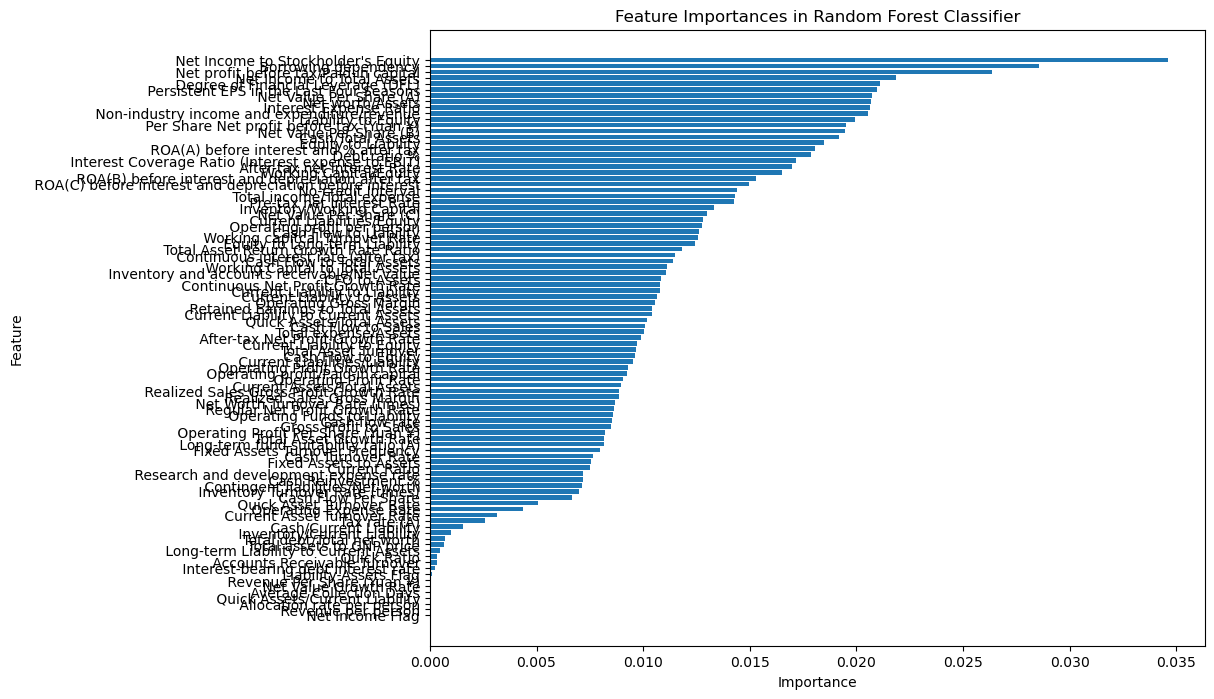

훈련 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9759483770043019
테스트 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9695014662756598
훈련 세트 MSE (하이퍼파라미터 튜닝 후): 0.024051622995698085
테스트 세트 MSE (하이퍼파라미터 튜닝 후): 0.030498533724340176
훈련 세트 MAE (하이퍼파라미터 튜닝 후): 0.024051622995698085
테스트 세트 MAE (하이퍼파라미터 튜닝 후): 0.030498533724340176
교차 검증 평균 정확도:  0.9672972576624138
교차 검증 MSE:  0.03270274233758615
교차 검증 MAE:  0.03270274233758615


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
data = pd.read_csv('./data.csv')

# 특성과 타겟 변수 분리
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_input)
X_test_scaled = scaler.transform(test_input)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, train_target)

# 특성 중요도 확인
importances = rf_model.feature_importances_
features = data_input.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

# 중요도가 낮은 특성 제거 (중요도 하위 10% 특성 제거)
threshold = feature_importances['Importance'].quantile(0.10)
important_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']
data_input_reduced = data_input[important_features]

# 데이터 분리 (중요도가 낮은 특성 제거 후)
train_input_reduced, test_input_reduced, train_target_reduced, test_target_reduced = train_test_split(
    data_input_reduced, data_target, random_state=42)

# 데이터 표준화 (중요도가 낮은 특성 제거 후)
X_train_scaled_reduced = scaler.fit_transform(train_input_reduced)
X_test_scaled_reduced = scaler.transform(test_input_reduced)

# 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy')
grid_search.fit(X_train_scaled_reduced, train_target_reduced)

best_rf_model = grid_search.best_estimator_

# 최적의 하이퍼파라미터로 모델 재학습
best_rf_model.fit(X_train_scaled_reduced, train_target_reduced)

# 예측
train_predictions_reduced = best_rf_model.predict(X_train_scaled_reduced)
test_predictions_reduced = best_rf_model.predict(X_test_scaled_reduced)

# 모델 평가 - 정확도
train_accuracy_reduced = accuracy_score(train_target_reduced, train_predictions_reduced)
test_accuracy_reduced = accuracy_score(test_target_reduced, test_predictions_reduced)

# 모델 평가 - MSE, MAE
train_mse_reduced = mean_squared_error(train_target_reduced, train_predictions_reduced)
test_mse_reduced = mean_squared_error(test_target_reduced, test_predictions_reduced)
train_mae_reduced = mean_absolute_error(train_target_reduced, train_predictions_reduced)
test_mae_reduced = mean_absolute_error(test_target_reduced, test_predictions_reduced)

print(f"훈련 세트 정확도 (하이퍼파라미터 튜닝 후): {train_accuracy_reduced}")
print(f"테스트 세트 정확도 (하이퍼파라미터 튜닝 후): {test_accuracy_reduced}")
print(f"훈련 세트 MSE (하이퍼파라미터 튜닝 후): {train_mse_reduced}")
print(f"테스트 세트 MSE (하이퍼파라미터 튜닝 후): {test_mse_reduced}")
print(f"훈련 세트 MAE (하이퍼파라미터 튜닝 후): {train_mae_reduced}")
print(f"테스트 세트 MAE (하이퍼파라미터 튜닝 후): {test_mae_reduced}")

# 교차 검증 (Cross-Validation)
cv_scores = cross_val_score(best_rf_model, data_input_reduced, data_target, cv=3)
cv_predictions = cross_val_predict(best_rf_model, data_input_reduced, data_target, cv=3)

# 교차 검증 평가 - 정확도
cv_accuracy = np.mean(cv_scores)

# 교차 검증 평가 - MSE, MAE
cv_mse = mean_squared_error(data_target, cv_predictions)
cv_mae = mean_absolute_error(data_target, cv_predictions)

print("교차 검증 평균 정확도: ", cv_accuracy)
print("교차 검증 MSE: ", cv_mse)
print("교차 검증 MAE: ", cv_mae)


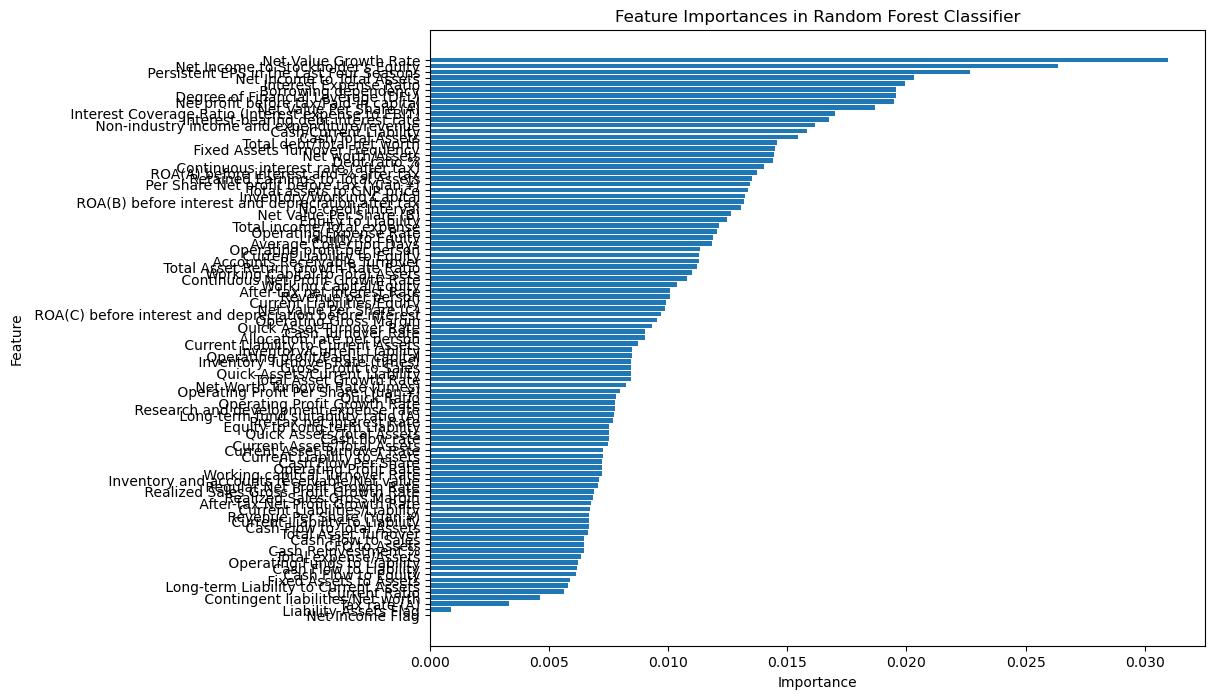

훈련 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9978000488878025
테스트 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9706744868035191
훈련 세트 MSE (하이퍼파라미터 튜닝 후): 0.002199951112197507
테스트 세트 MSE (하이퍼파라미터 튜닝 후): 0.02932551319648094
훈련 세트 MAE (하이퍼파라미터 튜닝 후): 0.002199951112197507
테스트 세트 MAE (하이퍼파라미터 튜닝 후): 0.02932551319648094
교차 검증 평균 정확도:  0.9600350817562974
교차 검증 MSE:  0.03996333638863428
교차 검증 MAE:  0.03996333638863428


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
data = pd.read_csv('./train_data.csv')

# 특성과 타겟 변수 분리
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_input, train_target)

# 특성 중요도 확인
importances = rf_model.feature_importances_
features = data_input.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

# 중요도가 낮은 특성 제거 (중요도 하위 10% 특성 제거)
threshold = feature_importances['Importance'].quantile(0.10)
important_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']
data_input_reduced = data_input[important_features]

# 데이터 분리 (중요도가 낮은 특성 제거 후)
train_input_reduced, test_input_reduced, train_target_reduced, test_target_reduced = train_test_split(
    data_input_reduced, data_target, random_state=42)

# 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy')
grid_search.fit(train_input_reduced, train_target_reduced)

best_rf_model = grid_search.best_estimator_

# 최적의 하이퍼파라미터로 모델 재학습
best_rf_model.fit(train_input_reduced, train_target_reduced)

# 예측
train_predictions_reduced = best_rf_model.predict(train_input_reduced)
test_predictions_reduced = best_rf_model.predict(test_input_reduced)

# 모델 평가 - 정확도
train_accuracy_reduced = accuracy_score(train_target_reduced, train_predictions_reduced)
test_accuracy_reduced = accuracy_score(test_target_reduced, test_predictions_reduced)

# 모델 평가 - MSE, MAE
train_mse_reduced = mean_squared_error(train_target_reduced, train_predictions_reduced)
test_mse_reduced = mean_squared_error(test_target_reduced, test_predictions_reduced)
train_mae_reduced = mean_absolute_error(train_target_reduced, train_predictions_reduced)
test_mae_reduced = mean_absolute_error(test_target_reduced, test_predictions_reduced)

print(f"훈련 세트 정확도 (하이퍼파라미터 튜닝 후): {train_accuracy_reduced}")
print(f"테스트 세트 정확도 (하이퍼파라미터 튜닝 후): {test_accuracy_reduced}")
print(f"훈련 세트 MSE (하이퍼파라미터 튜닝 후): {train_mse_reduced}")
print(f"테스트 세트 MSE (하이퍼파라미터 튜닝 후): {test_mse_reduced}")
print(f"훈련 세트 MAE (하이퍼파라미터 튜닝 후): {train_mae_reduced}")
print(f"테스트 세트 MAE (하이퍼파라미터 튜닝 후): {test_mae_reduced}")

# 교차 검증 (Cross-Validation)
cv_scores = cross_val_score(best_rf_model, data_input_reduced, data_target, cv=3)
cv_predictions = cross_val_predict(best_rf_model, data_input_reduced, data_target, cv=3)

# 교차 검증 평가 - 정확도
cv_accuracy = np.mean(cv_scores)

# 교차 검증 평가 - MSE, MAE
cv_mse = mean_squared_error(data_target, cv_predictions)
cv_mae = mean_absolute_error(data_target, cv_predictions)

print("교차 검증 평균 정확도: ", cv_accuracy)
print("교차 검증 MSE: ", cv_mse)
print("교차 검증 MAE: ", cv_mae)


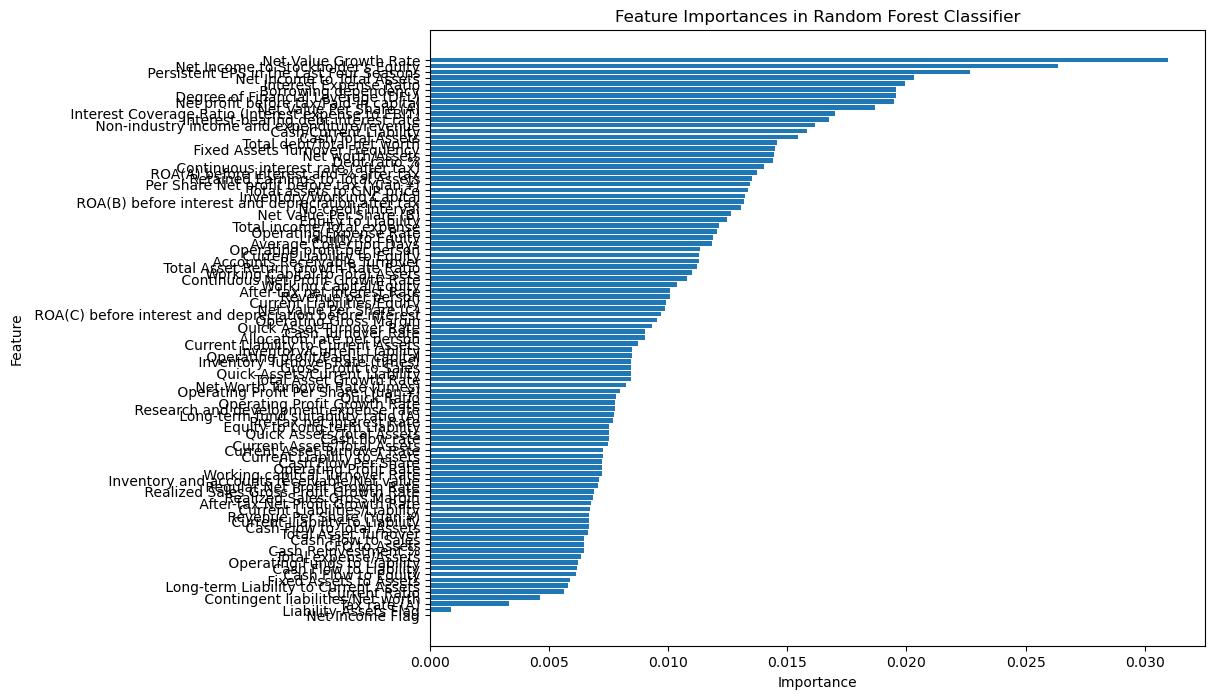

훈련 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9978000488878025
테스트 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9706744868035191
ntest 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9875366568914956
훈련 세트 MSE (하이퍼파라미터 튜닝 후): 0.002199951112197507
테스트 세트 MSE (하이퍼파라미터 튜닝 후): 0.02932551319648094
ntest 세트 MSE (하이퍼파라미터 튜닝 후): 0.012463343108504398
훈련 세트 MAE (하이퍼파라미터 튜닝 후): 0.002199951112197507
테스트 세트 MAE (하이퍼파라미터 튜닝 후): 0.02932551319648094
ntest 세트 MAE (하이퍼파라미터 튜닝 후): 0.012463343108504398
교차 검증 평균 정확도:  0.9600350817562974
교차 검증 MSE:  0.03996333638863428
교차 검증 MAE:  0.03996333638863428


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
data = pd.read_csv('./train_data.csv')
n_data = pd.read_csv('./test_data.csv')

# 특성과 타겟 변수 분리
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

ntest_input = n_data.drop(columns=['Bankrupt?'])
ntest_target = n_data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_input, train_target)

# 특성 중요도 확인
importances = rf_model.feature_importances_
features = data_input.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

# 중요도가 낮은 특성 제거 (중요도 하위 10% 특성 제거)
threshold = feature_importances['Importance'].quantile(0.10)
important_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']
data_input_reduced = data_input[important_features]
ntest_input_reduced = ntest_input[important_features]

# 데이터 분리 (중요도가 낮은 특성 제거 후)
train_input_reduced, test_input_reduced, train_target_reduced, test_target_reduced = train_test_split(
    data_input_reduced, data_target, random_state=42)

# 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy')
grid_search.fit(train_input_reduced, train_target_reduced)

best_rf_model = grid_search.best_estimator_

# 최적의 하이퍼파라미터로 모델 재학습
best_rf_model.fit(train_input_reduced, train_target_reduced)

# 예측
train_predictions_reduced = best_rf_model.predict(train_input_reduced)
test_predictions_reduced = best_rf_model.predict(test_input_reduced)
ntest_predictions_reduced = best_rf_model.predict(ntest_input_reduced)

# 모델 평가 - 정확도
train_accuracy_reduced = accuracy_score(train_target_reduced, train_predictions_reduced)
test_accuracy_reduced = accuracy_score(test_target_reduced, test_predictions_reduced)
ntest_accuracy_reduced = accuracy_score(ntest_target, ntest_predictions_reduced)

# 모델 평가 - MSE, MAE
train_mse_reduced = mean_squared_error(train_target_reduced, train_predictions_reduced)
test_mse_reduced = mean_squared_error(test_target_reduced, test_predictions_reduced)
ntest_mse_reduced = mean_squared_error(ntest_target, ntest_predictions_reduced)

train_mae_reduced = mean_absolute_error(train_target_reduced, train_predictions_reduced)
test_mae_reduced = mean_absolute_error(test_target_reduced, test_predictions_reduced)
ntest_mae_reduced = mean_absolute_error(ntest_target, ntest_predictions_reduced)

print(f"훈련 세트 정확도 (하이퍼파라미터 튜닝 후): {train_accuracy_reduced}")
print(f"테스트 세트 정확도 (하이퍼파라미터 튜닝 후): {test_accuracy_reduced}")
print(f"ntest 세트 정확도 (하이퍼파라미터 튜닝 후): {ntest_accuracy_reduced}")

print(f"훈련 세트 MSE (하이퍼파라미터 튜닝 후): {train_mse_reduced}")
print(f"테스트 세트 MSE (하이퍼파라미터 튜닝 후): {test_mse_reduced}")
print(f"ntest 세트 MSE (하이퍼파라미터 튜닝 후): {ntest_mse_reduced}")

print(f"훈련 세트 MAE (하이퍼파라미터 튜닝 후): {train_mae_reduced}")
print(f"테스트 세트 MAE (하이퍼파라미터 튜닝 후): {test_mae_reduced}")
print(f"ntest 세트 MAE (하이퍼파라미터 튜닝 후): {ntest_mae_reduced}")

# 교차 검증 (Cross-Validation)
cv_scores = cross_val_score(best_rf_model, data_input_reduced, data_target, cv=3)
cv_predictions = cross_val_predict(best_rf_model, data_input_reduced, data_target, cv=3)

# 교차 검증 평가 - 정확도
cv_accuracy = np.mean(cv_scores)

# 교차 검증 평가 - MSE, MAE
cv_mse = mean_squared_error(data_target, cv_predictions)
cv_mae = mean_absolute_error(data_target, cv_predictions)

print("교차 검증 평균 정확도: ", cv_accuracy)
print("교차 검증 MSE: ", cv_mse)
print("교차 검증 MAE: ", cv_mae)


# 표준화 안한 랜덤포레스트(train_data만)

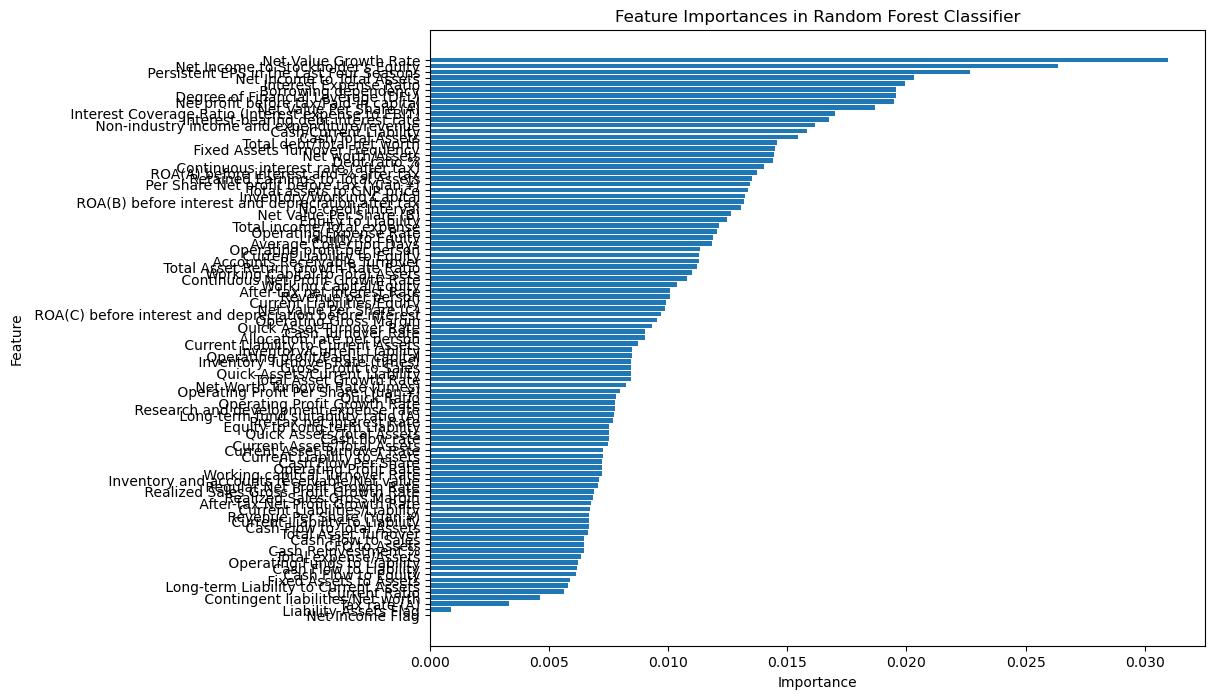

훈련 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9772671718406257
테스트 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9714076246334311
훈련 세트 MSE (하이퍼파라미터 튜닝 후): 0.022732828159374236
테스트 세트 MSE (하이퍼파라미터 튜닝 후): 0.028592375366568914
훈련 세트 MAE (하이퍼파라미터 튜닝 후): 0.022732828159374236
테스트 세트 MAE (하이퍼파라미터 튜닝 후): 0.028592375366568914
교차 검증 평균 정확도:  0.9616859523592088
교차 검증 MSE:  0.0383134738771769
교차 검증 MAE:  0.0383134738771769


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
data = pd.read_csv('./train_data.csv')

# 특성과 타겟 변수 분리
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_input, train_target)

# 특성 중요도 확인
importances = rf_model.feature_importances_
features = data_input.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

# 중요도가 낮은 특성 제거 (중요도 하위 10% 특성 제거)
threshold = feature_importances['Importance'].quantile(0.10)
important_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']
data_input_reduced = data_input[important_features]

# 데이터 분리 (중요도가 낮은 특성 제거 후)
train_input_reduced, test_input_reduced, train_target_reduced, test_target_reduced = train_test_split(
    data_input_reduced, data_target, random_state=42)

# 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [4, 6],
    'bootstrap': [True]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy')
grid_search.fit(train_input_reduced, train_target_reduced)

best_rf_model = grid_search.best_estimator_

# 최적의 하이퍼파라미터로 모델 재학습
best_rf_model.fit(train_input_reduced, train_target_reduced)

# 예측
train_predictions_reduced = best_rf_model.predict(train_input_reduced)
test_predictions_reduced = best_rf_model.predict(test_input_reduced)

# 모델 평가 - 정확도
train_accuracy_reduced = accuracy_score(train_target_reduced, train_predictions_reduced)
test_accuracy_reduced = accuracy_score(test_target_reduced, test_predictions_reduced)

# 모델 평가 - MSE, MAE
train_mse_reduced = mean_squared_error(train_target_reduced, train_predictions_reduced)
test_mse_reduced = mean_squared_error(test_target_reduced, test_predictions_reduced)
train_mae_reduced = mean_absolute_error(train_target_reduced, train_predictions_reduced)
test_mae_reduced = mean_absolute_error(test_target_reduced, test_predictions_reduced)

print(f"훈련 세트 정확도 (하이퍼파라미터 튜닝 후): {train_accuracy_reduced}")
print(f"테스트 세트 정확도 (하이퍼파라미터 튜닝 후): {test_accuracy_reduced}")
print(f"훈련 세트 MSE (하이퍼파라미터 튜닝 후): {train_mse_reduced}")
print(f"테스트 세트 MSE (하이퍼파라미터 튜닝 후): {test_mse_reduced}")
print(f"훈련 세트 MAE (하이퍼파라미터 튜닝 후): {train_mae_reduced}")
print(f"테스트 세트 MAE (하이퍼파라미터 튜닝 후): {test_mae_reduced}")

# 교차 검증 (Cross-Validation)
cv_scores = cross_val_score(best_rf_model, data_input_reduced, data_target, cv=3)
cv_predictions = cross_val_predict(best_rf_model, data_input_reduced, data_target, cv=3)

# 교차 검증 평가 - 정확도
cv_accuracy = np.mean(cv_scores)

# 교차 검증 평가 - MSE, MAE
cv_mse = mean_squared_error(data_target, cv_predictions)
cv_mae = mean_absolute_error(data_target, cv_predictions)

print("교차 검증 평균 정확도: ", cv_accuracy)
print("교차 검증 MSE: ", cv_mse)
print("교차 검증 MAE: ", cv_mae)


# 표준화 안한 랜덤포레스트(train_data, test_data)

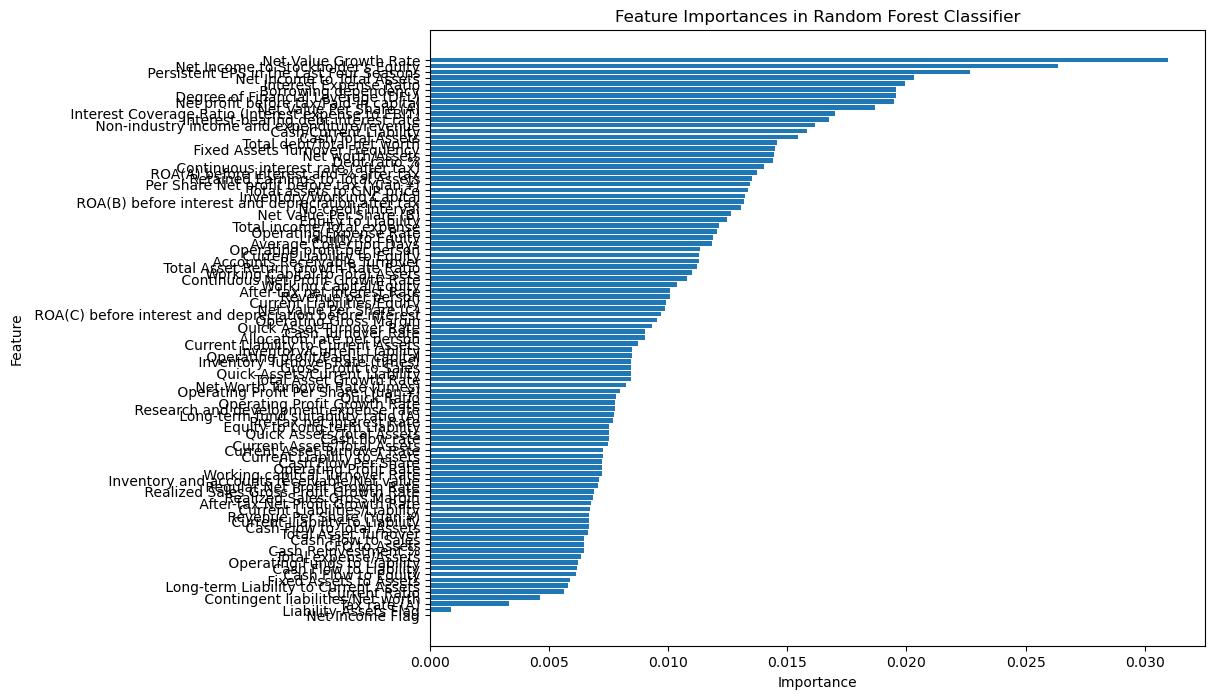

훈련 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9772671718406257
테스트 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9714076246334311
ntest 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9868035190615836
훈련 세트 MSE (하이퍼파라미터 튜닝 후): 0.022732828159374236
테스트 세트 MSE (하이퍼파라미터 튜닝 후): 0.028592375366568914
ntest 세트 MSE (하이퍼파라미터 튜닝 후): 0.013196480938416423
훈련 세트 MAE (하이퍼파라미터 튜닝 후): 0.022732828159374236
테스트 세트 MAE (하이퍼파라미터 튜닝 후): 0.028592375366568914
ntest 세트 MAE (하이퍼파라미터 튜닝 후): 0.013196480938416423
교차 검증 평균 정확도:  0.9650451572741114
교차 검증 MSE:  0.03495477878269372
교차 검증 MAE:  0.03495477878269372


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
data = pd.read_csv('./train_data.csv')
n_data = pd.read_csv('./test_data.csv')

# 특성과 타겟 변수 분리
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

ntest_input = n_data.drop(columns=['Bankrupt?'])
ntest_target = n_data['Bankrupt?']

# 데이터 분리 (train_data에서 train/test 분리)
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_input, train_target)

# 특성 중요도 확인
importances = rf_model.feature_importances_
features = data_input.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

# 중요도가 낮은 특성 제거 (중요도 하위 10% 특성 제거)
threshold = feature_importances['Importance'].quantile(0.10)
important_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']
train_input_reduced = train_input[important_features]
test_input_reduced = test_input[important_features]
ntest_input_reduced = ntest_input[important_features]

# 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [4, 6],
    'bootstrap': [True]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy')
grid_search.fit(train_input_reduced, train_target)

best_rf_model = grid_search.best_estimator_

# 최적의 하이퍼파라미터로 모델 재학습
best_rf_model.fit(train_input_reduced, train_target)

# 예측
train_predictions_reduced = best_rf_model.predict(train_input_reduced)
test_predictions_reduced = best_rf_model.predict(test_input_reduced)
ntest_predictions_reduced = best_rf_model.predict(ntest_input_reduced)

# 모델 평가 - 정확도
train_accuracy_reduced = accuracy_score(train_target, train_predictions_reduced)
test_accuracy_reduced = accuracy_score(test_target, test_predictions_reduced)
ntest_accuracy_reduced = accuracy_score(ntest_target, ntest_predictions_reduced)

# 모델 평가 - MSE, MAE
train_mse_reduced = mean_squared_error(train_target, train_predictions_reduced)
test_mse_reduced = mean_squared_error(test_target, test_predictions_reduced)
ntest_mse_reduced = mean_squared_error(ntest_target, ntest_predictions_reduced)

train_mae_reduced = mean_absolute_error(train_target, train_predictions_reduced)
test_mae_reduced = mean_absolute_error(test_target, test_predictions_reduced)
ntest_mae_reduced = mean_absolute_error(ntest_target, ntest_predictions_reduced)

print(f"훈련 세트 정확도 (하이퍼파라미터 튜닝 후): {train_accuracy_reduced}")
print(f"테스트 세트 정확도 (하이퍼파라미터 튜닝 후): {test_accuracy_reduced}")
print(f"ntest 세트 정확도 (하이퍼파라미터 튜닝 후): {ntest_accuracy_reduced}")

print(f"훈련 세트 MSE (하이퍼파라미터 튜닝 후): {train_mse_reduced}")
print(f"테스트 세트 MSE (하이퍼파라미터 튜닝 후): {test_mse_reduced}")
print(f"ntest 세트 MSE (하이퍼파라미터 튜닝 후): {ntest_mse_reduced}")

print(f"훈련 세트 MAE (하이퍼파라미터 튜닝 후): {train_mae_reduced}")
print(f"테스트 세트 MAE (하이퍼파라미터 튜닝 후): {test_mae_reduced}")
print(f"ntest 세트 MAE (하이퍼파라미터 튜닝 후): {ntest_mae_reduced}")

# 교차 검증 (Cross-Validation)
cv_scores = cross_val_score(best_rf_model, train_input_reduced, train_target, cv=3)
cv_predictions = cross_val_predict(best_rf_model, train_input_reduced, train_target, cv=3)

# 교차 검증 평가 - 정확도
cv_accuracy = np.mean(cv_scores)

# 교차 검증 평가 - MSE, MAE
cv_mse = mean_squared_error(train_target, cv_predictions)
cv_mae = mean_absolute_error(train_target, cv_predictions)

print("교차 검증 평균 정확도: ", cv_accuracy)
print("교차 검증 MSE: ", cv_mse)
print("교차 검증 MAE: ", cv_mae)


# XGBoost

In [4]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
# import xgboost as xgb
# import numpy as np
# import matplotlib.pyplot as plt

# # 데이터 불러오기
# data = pd.read_csv('./data.csv')

# # 특성과 타겟 변수 분리
# data_input = data.drop(columns=['Bankrupt?'])
# data_target = data['Bankrupt?']

# # 데이터 분리
# train_input, test_input, train_target, test_target = train_test_split(
#     data_input, data_target, random_state=42)

# # 데이터 표준화
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(train_input)
# X_test_scaled = scaler.transform(test_input)

# # XGBoost 모델 학습
# xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
# xgb_model.fit(X_train_scaled, train_target)

# # 특성 중요도 확인
# importances = xgb_model.feature_importances_
# features = data_input.columns
# feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
# feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# # 특성 중요도 시각화
# plt.figure(figsize=(10, 8))
# plt.barh(feature_importances['Feature'], feature_importances['Importance'])
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importances in XGBoost')
# plt.gca().invert_yaxis()
# plt.show()

# # 중요도가 낮은 특성 제거 (중요도 하위 10% 특성 제거)
# threshold = feature_importances['Importance'].quantile(0.10)
# important_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']
# data_input_reduced = data_input[important_features]

# # 데이터 분리 (중요도가 낮은 특성 제거 후)
# train_input_reduced, test_input_reduced, train_target_reduced, test_target_reduced = train_test_split(
#     data_input_reduced, data_target, random_state=42)

# # 데이터 표준화 (중요도가 낮은 특성 제거 후)
# X_train_scaled_reduced = scaler.fit_transform(train_input_reduced)
# X_test_scaled_reduced = scaler.transform(test_input_reduced)

# # XGBoost 하이퍼파라미터 튜닝
# param_grid = {
#     'n_estimators': [150, 200, 250],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# grid_search_xgb = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
#                                param_grid=param_grid,
#                                cv=3,
#                                n_jobs=-1,
#                                scoring='accuracy')
# grid_search_xgb.fit(X_train_scaled_reduced, train_target_reduced)

# best_xgb_model = grid_search_xgb.best_estimator_

# # 최적의 하이퍼파라미터로 모델 재학습
# best_xgb_model.fit(X_train_scaled_reduced, train_target_reduced)

# # 예측
# train_predictions_xgb = best_xgb_model.predict(X_train_scaled_reduced)
# test_predictions_xgb = best_xgb_model.predict(X_test_scaled_reduced)

# # 모델 평가 - 정확도
# train_accuracy_xgb = accuracy_score(train_target_reduced, train_predictions_xgb)
# test_accuracy_xgb = accuracy_score(test_target_reduced, test_predictions_xgb)

# # 모델 평가 - MSE, MAE
# train_mse_xgb = mean_squared_error(train_target_reduced, train_predictions_xgb)
# test_mse_xgb = mean_squared_error(test_target_reduced, test_predictions_xgb)
# train_mae_xgb = mean_absolute_error(train_target_reduced, train_predictions_xgb)
# test_mae_xgb = mean_absolute_error(test_target_reduced, test_predictions_xgb)

# print(f"XGBoost 훈련 세트 정확도 (하이퍼파라미터 튜닝 후): {train_accuracy_xgb}")
# print(f"XGBoost 테스트 세트 정확도 (하이퍼파라미터 튜닝 후): {test_accuracy_xgb}")
# print(f"XGBoost 훈련 세트 MSE (하이퍼파라미터 튜닝 후): {train_mse_xgb}")
# print(f"XGBoost 테스트 세트 MSE (하이퍼파라미터 튜닝 후): {test_mse_xgb}")
# print(f"XGBoost 훈련 세트 MAE (하이퍼파라미터 튜닝 후): {train_mae_xgb}")
# print(f"XGBoost 테스트 세트 MAE (하이퍼파라미터 튜닝 후): {test_mae_xgb}")

# # 교차 검증 (Cross-Validation)
# cv_scores_xgb = cross_val_score(best_xgb_model, data_input_reduced, data_target, cv=3)
# cv_predictions_xgb = cross_val_predict(best_xgb_model, data_input_reduced, data_target, cv=3)

# # 교차 검증 평가 - 정확도
# cv_accuracy_xgb = np.mean(cv_scores_xgb)

# # 교차 검증 평가 - MSE, MAE
# cv_mse_xgb = mean_squared_error(data_target, cv_predictions_xgb)
# cv_mae_xgb = mean_absolute_error(data_target, cv_predictions_xgb)

# print("XGBoost 교차 검증 평균 정확도: ", cv_accuracy_xgb)
# print("XGBoost 교차 검증 MSE: ", cv_mse_xgb)
# print("XGBoost 교차 검증 MAE: ", cv_mae_xgb)


# LightBGM

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import lightgbm as lgb
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('./data.csv')

# 특성과 타겟 변수 분리
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_input)
X_test_scaled = scaler.transform(test_input)

# 랜덤 포레스트 모델로 특성 중요도 확인
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, train_target)

# 특성 중요도 계산
importances = rf_model.feature_importances_
features = data_input.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 중요도가 낮은 특성 제거 (중요도 하위 10% 특성 제거)
threshold = feature_importances['Importance'].quantile(0.10)
important_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']
data_input_reduced = data_input[important_features]

# 데이터 분리 (중요도가 낮은 특성 제거 후)
train_input_reduced, test_input_reduced, train_target_reduced, test_target_reduced = train_test_split(
    data_input_reduced, data_target, random_state=42)

# 데이터 표준화 (중요도가 낮은 특성 제거 후)
X_train_scaled_reduced = scaler.fit_transform(train_input_reduced)
X_test_scaled_reduced = scaler.transform(test_input_reduced)

# LightGBM 하이퍼파라미터 튜닝
param_grid_lgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3],
    'reg_alpha': [0.01, 0.1, 1],  # L1 정규화
    'reg_lambda': [0.01, 0.1, 1]  # L2 정규화
}

grid_search_lgb = GridSearchCV(estimator=lgb.LGBMClassifier(random_state=42),
                               param_grid=param_grid_lgb,
                               cv=3,
                               n_jobs=-1,
                               scoring='accuracy')
grid_search_lgb.fit(X_train_scaled_reduced, train_target_reduced)

best_lgb_model = grid_search_lgb.best_estimator_

# 최적의 하이퍼파라미터로 모델 재학습
best_lgb_model.fit(X_train_scaled_reduced, train_target_reduced)

# 예측
train_predictions_lgb = best_lgb_model.predict(X_train_scaled_reduced)
test_predictions_lgb = best_lgb_model.predict(X_test_scaled_reduced)

# 모델 평가 - 정확도
train_accuracy_lgb = accuracy_score(train_target_reduced, train_predictions_lgb)
test_accuracy_lgb = accuracy_score(test_target_reduced, test_predictions_lgb)

# 모델 평가 - MSE, MAE
train_mse_lgb = mean_squared_error(train_target_reduced, train_predictions_lgb)
test_mse_lgb = mean_squared_error(test_target_reduced, test_predictions_lgb)
train_mae_lgb = mean_absolute_error(train_target_reduced, train_predictions_lgb)
test_mae_lgb = mean_absolute_error(test_target_reduced, test_predictions_lgb)

print(f"LightGBM 훈련 세트 정확도 (하이퍼파라미터 튜닝 후): {train_accuracy_lgb}")
print(f"LightGBM 테스트 세트 정확도 (하이퍼파라미터 튜닝 후): {test_accuracy_lgb}")
print(f"LightGBM 훈련 세트 MSE (하이퍼파라미터 튜닝 후): {train_mse_lgb}")
print(f"LightGBM 테스트 세트 MSE (하이퍼파라미터 튜닝 후): {test_mse_lgb}")
print(f"LightGBM 훈련 세트 MAE (하이퍼파라미터 튜닝 후): {train_mae_lgb}")
print(f"LightGBM 테스트 세트 MAE (하이퍼파라미터 튜닝 후): {test_mae_lgb}")

# 교차 검증 (Cross-Validation)
cv_scores_lgb = cross_val_score(best_lgb_model, data_input_reduced, data_target, cv=3)
cv_predictions_lgb = cross_val_predict(best_lgb_model, data_input_reduced, data_target, cv=3)

# 교차 검증 평가 - 정확도
cv_accuracy_lgb = np.mean(cv_scores_lgb)

# 교차 검증 평가 - MSE, MAE
cv_mse_lgb = mean_squared_error(data_target, cv_predictions_lgb)
cv_mae_lgb = mean_absolute_error(data_target, cv_predictions_lgb)

print("LightGBM 교차 검증 평균 정확도: ", cv_accuracy_lgb)
print("LightGBM 교차 검증 MSE: ", cv_mse_lgb)
print("LightGBM 교차 검증 MAE: ", cv_mae_lgb)


KeyboardInterrupt: 

In [9]:

print(f"LightGBM 훈련 세트 정확도 (하이퍼파라미터 튜닝 후): {train_accuracy_lgb}")
print(f"LightGBM 테스트 세트 정확도 (하이퍼파라미터 튜닝 후): {test_accuracy_lgb}")
print(f"LightGBM 훈련 세트 MSE (하이퍼파라미터 튜닝 후): {train_mse_lgb}")
print(f"LightGBM 테스트 세트 MSE (하이퍼파라미터 튜닝 후): {test_mse_lgb}")
print(f"LightGBM 훈련 세트 MAE (하이퍼파라미터 튜닝 후): {train_mae_lgb}")
print(f"LightGBM 테스트 세트 MAE (하이퍼파라미터 튜닝 후): {test_mae_lgb}")
print("LightGBM 교차 검증 평균 정확도: ", cv_accuracy_lgb)
print("LightGBM 교차 검증 MSE: ", cv_mse_lgb)
print("LightGBM 교차 검증 MAE: ", cv_mae_lgb)

LightGBM 훈련 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9902229174814235
LightGBM 테스트 세트 정확도 (하이퍼파라미터 튜닝 후): 0.967741935483871
LightGBM 훈련 세트 MSE (하이퍼파라미터 튜닝 후): 0.009777082518576457
LightGBM 테스트 세트 MSE (하이퍼파라미터 튜닝 후): 0.03225806451612903
LightGBM 훈련 세트 MAE (하이퍼파라미터 튜닝 후): 0.009777082518576457
LightGBM 테스트 세트 MAE (하이퍼파라미터 튜닝 후): 0.03225806451612903
LightGBM 교차 검증 평균 정확도:  0.9652441706995161
LightGBM 교차 검증 MSE:  0.034755829300483945
LightGBM 교차 검증 MAE:  0.034755829300483945


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import lightgbm as lgb
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('./data.csv')

# 특성과 타겟 변수 분리
data_input = data.drop(columns=['Bankrupt?'])
data_target = data['Bankrupt?']

# 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_input)
X_test_scaled = scaler.transform(test_input)

# 랜덤 포레스트 모델로 특성 중요도 확인
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, train_target)

# 특성 중요도 계산
importances = rf_model.feature_importances_
features = data_input.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 중요도가 낮은 특성 제거 (중요도 하위 10% 특성 제거)
threshold = feature_importances['Importance'].quantile(0.10)
important_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']
data_input_reduced = data_input[important_features]

# 데이터 분리 (중요도가 낮은 특성 제거 후)
train_input_reduced, test_input_reduced, train_target_reduced, test_target_reduced = train_test_split(
    data_input_reduced, data_target, random_state=42)

# 데이터 표준화 (중요도가 낮은 특성 제거 후)
X_train_scaled_reduced = scaler.fit_transform(train_input_reduced)
X_test_scaled_reduced = scaler.transform(test_input_reduced)

# LightGBM 하이퍼파라미터 튜닝
param_grid_lgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3],
    'reg_alpha': [0.1, 1, 10],  # L1 정규화
    'reg_lambda': [0.1, 1, 10]  # L2 정규화
}

grid_search_lgb = GridSearchCV(estimator=lgb.LGBMClassifier(random_state=42),
                               param_grid=param_grid_lgb,
                               cv=3,
                               n_jobs=-1,
                               scoring='accuracy')
grid_search_lgb.fit(X_train_scaled_reduced, train_target_reduced)

best_lgb_model = grid_search_lgb.best_estimator_

# 최적의 하이퍼파라미터로 모델 재학습
best_lgb_model.fit(X_train_scaled_reduced, train_target_reduced)

# 예측
train_predictions_lgb = best_lgb_model.predict(X_train_scaled_reduced)
test_predictions_lgb = best_lgb_model.predict(X_test_scaled_reduced)

# 모델 평가 - 정확도
train_accuracy_lgb = accuracy_score(train_target_reduced, train_predictions_lgb)
test_accuracy_lgb = accuracy_score(test_target_reduced, test_predictions_lgb)

# 모델 평가 - MSE, MAE
train_mse_lgb = mean_squared_error(train_target_reduced, train_predictions_lgb)
test_mse_lgb = mean_squared_error(test_target_reduced, test_predictions_lgb)
train_mae_lgb = mean_absolute_error(train_target_reduced, train_predictions_lgb)
test_mae_lgb = mean_absolute_error(test_target_reduced, test_predictions_lgb)

print(f"LightGBM 훈련 세트 정확도 (하이퍼파라미터 튜닝 후): {train_accuracy_lgb}")
print(f"LightGBM 테스트 세트 정확도 (하이퍼파라미터 튜닝 후): {test_accuracy_lgb}")
print(f"LightGBM 훈련 세트 MSE (하이퍼파라미터 튜닝 후): {train_mse_lgb}")
print(f"LightGBM 테스트 세트 MSE (하이퍼파라미터 튜닝 후): {test_mse_lgb}")
print(f"LightGBM 훈련 세트 MAE (하이퍼파라미터 튜닝 후): {train_mae_lgb}")
print(f"LightGBM 테스트 세트 MAE (하이퍼파라미터 튜닝 후): {test_mae_lgb}")

# 교차 검증 (Cross-Validation)
cv_scores_lgb = cross_val_score(best_lgb_model, data_input_reduced, data_target, cv=3)
cv_predictions_lgb = cross_val_predict(best_lgb_model, data_input_reduced, data_target, cv=3)

# 교차 검증 평가 - 정확도
cv_accuracy_lgb = np.mean(cv_scores_lgb)

# 교차 검증 평가 - MSE, MAE
cv_mse_lgb = mean_squared_error(data_target, cv_predictions_lgb)
cv_mae_lgb = mean_absolute_error(data_target, cv_predictions_lgb)

print("LightGBM 교차 검증 평균 정확도: ", cv_accuracy_lgb)
print("LightGBM 교차 검증 MSE: ", cv_mse_lgb)
print("LightGBM 교차 검증 MAE: ", cv_mae_lgb)


[LightGBM] [Info] Number of positive: 162, number of negative: 4952
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21673
[LightGBM] [Info] Number of data points in the train set: 5114, number of used features: 85
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.031678 -> initscore=-3.419950
[LightGBM] [Info] Start training from score -3.419950
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [16]:
print(f"LightGBM 훈련 세트 정확도 (하이퍼파라미터 튜닝 후): {train_accuracy_lgb}")
print(f"LightGBM 테스트 세트 정확도 (하이퍼파라미터 튜닝 후): {test_accuracy_lgb}")
print(f"LightGBM 훈련 세트 MSE (하이퍼파라미터 튜닝 후): {train_mse_lgb}")
print(f"LightGBM 테스트 세트 MSE (하이퍼파라미터 튜닝 후): {test_mse_lgb}")
print(f"LightGBM 훈련 세트 MAE (하이퍼파라미터 튜닝 후): {train_mae_lgb}")
print(f"LightGBM 테스트 세트 MAE (하이퍼파라미터 튜닝 후): {test_mae_lgb}")
print("LightGBM 교차 검증 평균 정확도: ", cv_accuracy_lgb)
print("LightGBM 교차 검증 MSE: ", cv_mse_lgb)
print("LightGBM 교차 검증 MAE: ", cv_mae_lgb)

LightGBM 훈련 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9927649589362534
LightGBM 테스트 세트 정확도 (하이퍼파라미터 튜닝 후): 0.9718475073313783
LightGBM 훈련 세트 MSE (하이퍼파라미터 튜닝 후): 0.007235041063746578
LightGBM 테스트 세트 MSE (하이퍼파라미터 튜닝 후): 0.0281524926686217
LightGBM 훈련 세트 MAE (하이퍼파라미터 튜닝 후): 0.007235041063746578
LightGBM 테스트 세트 MAE (하이퍼파라미터 튜닝 후): 0.0281524926686217
LightGBM 교차 검증 평균 정확도:  0.9637776800117318
LightGBM 교차 검증 MSE:  0.036222319988268074
LightGBM 교차 검증 MAE:  0.036222319988268074
